In [1]:
#script for discovering the best number of attributes


def best_num_attr(xList, xListTrain, xListTest, labelsTrain, labelsTest):
    #build list of attributes one-at-a-time - starting with empty
    attributeList = []
    index = range(len(xList[1]))
    indexSet = set(index)
    indexSeq = []
    oosError = []

    for i in index:
        attSet = set(attributeList) #set creates a list of unordered collection of unique items
        #attributes not in list already
        attTrySet = indexSet - attSet
        #form into list
        attTry = [ii for ii in attTrySet]
        errorList = []
        attTemp = []
        #try each attribute not in set to see which
        #one gives least oos error
        for iTry in attTry:
            attTemp = [] + attributeList
            attTemp.append(iTry)
            #use attTemp to form training and testing sub matrices
            #as list of lists
            xTrainTemp = xattrSelect(xListTrain, attTemp)
            xTestTemp = xattrSelect(xListTest, attTemp)
            #form into numpy arrays
            xTrain = numpy.array(xTrainTemp)
            yTrain = numpy.array(labelsTrain)
            xTest = numpy.array(xTestTemp)
            yTest = numpy.array(labelsTest)
            #use sci-kit learn linear regression
            wineQModel = linear_model.LinearRegression()
            wineQModel.fit(xTrain,yTrain)
            #use trained model to generate prediction and calculate rmsError
            rmsError = numpy.linalg.norm((yTest-wineQModel.predict(xTest)),2)/sqrt(len(yTest))
            errorList.append(rmsError)
            attTemp = []
        iBest = numpy.argmin(errorList)
        attributeList.append(attTry[iBest])
        oosError.append(errorList[iBest])
    print("Out of sample error versus attribute set size" )
    print(oosError)
    print("\n" + "Best attribute indices")
    print(attributeList)
    namesList = [names[i] for i in attributeList]
    print("\n" + "Best attribute names")
    print(namesList)

    #Plot error versus number of attributes
    x = range(len(oosError))
    plt.plot(x, oosError, 'k')
    plt.xlabel('Number of Attributes')
    plt.ylabel('Error (RMS)')
    plt.show()
   

In [12]:
#test if the function is working
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
import urllib
import csv

In [67]:
def xattrSelect(x, idxSet):
    #takes X matrix as list of list and returns subset containing
    #columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)

#read data into iterable
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
data = urllib.request.urlopen(target_url)
xList = []
labels = []
names = []
firstLine = True

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"

Out of sample error versus attribute set size
[0.72342592551162777, 0.68609931528371959, 0.67343650334202776, 0.66770332138977961, 0.6622558568522271, 0.65900047541546247, 0.65727172061430761, 0.65709058062076997, 0.65699930964461373, 0.65758189400434741, 0.65739098690113373]

Best attribute indices
[10, 1, 9, 4, 6, 8, 5, 3, 2, 7, 0]

Best attribute names
['"alcohol"', '"volatile acidity"', '"sulphates"', '"chlorides"', '"total sulfur dioxide"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"', '"fixed acidity"']


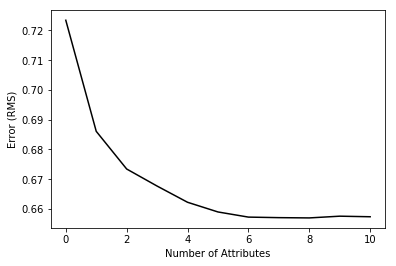

In [68]:
for line in data:
    if firstLine:
        print(line.decode('utf-8'))
        names = line.decode('utf-8').strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode('utf-8').strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#divide attributes and labels into training and test sets
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#call the function
best_num_attr(xList, xListTrain, xListTest, labelsTrain, labelsTest)